## 4.2 Multiple Output Linear Regression

# Multiple Outputs 

## Preparation

In [3]:
# import the libraries
from torch import nn
import torch

In [5]:
# Set random seed
torch.manual_seed(1)

## Create a custom function

In [13]:
# Custom linear regression function
class LR(nn.Module):
    # constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Function
    def forward(self,x):
        yhat = self.linear(x)
        return yhat

## Prediction

In [14]:
# Create a  model
model = LR(input_size=2, output_size=2)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2583, -0.2756],
         [-0.0516, -0.0637]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1025, -0.0028], requires_grad=True)]

In [17]:
x = torch.tensor([[1.,2.]])
yhat = model(x)

In [18]:
yhat

tensor([[-0.1904, -0.1817]], grad_fn=<AddmmBackward>)

In [21]:
x = torch.tensor([[1.,2.],[4., 5.], [8., 9.]])
yhat = model(x)

In [22]:
yhat

tensor([[-0.1904, -0.1817],
        [-0.2423, -0.5273],
        [-0.3115, -0.9882]], grad_fn=<AddmmBackward>)

# Multiple Linear Regression Training

## Preparation

In [23]:
# Import libriries

import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [24]:
# Set the random seed
torch.manual_seed(1)

## Create a custom function

In [13]:
# Custom linear regression function
class LR(nn.Module):
    # constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Function
    def forward(self,x):
        yhat = self.linear(x)
        return yhat

## Make Some Data

In [25]:
# create a dataset class
class Data2D(Dataset):
    #constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:,0] = torch.arange(-1, 1, 0.1)
        self.x[:,1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1., -1.],[1., -1]])
        self.b = torch.tensor([[1., -1]])
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # get a length
    def __len__(self):
        return self.len

In [26]:
# Create a dataset
data_set = Data2D()

In [27]:
# Create a loss function
criterion = nn.MSELoss()

In [28]:
# Create a trainloader
trainloader = DataLoader(dataset=data_set, batch_size=1)

In [29]:
# Create a model
model = LR(input_size=2, output_size=2)

In [30]:
# Create a optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

## Train the model

In [32]:
LOSS=[]
epochs=100
   
for epoch in range(epochs):
    for x,y in trainloader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

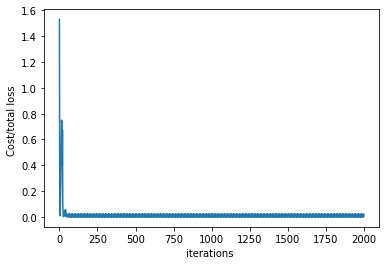

In [33]:
# Plot the result
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()